<a href="https://colab.research.google.com/github/dani-lbnl/camerawde2023/blob/main/WDEpythonMLdani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WDE python tutorial
- interactively add [shared folder](https://drive.google.com/drive/folders/1mO2gTKXKqwwI13KQwNfWUg23A9XRRHV0?usp=share_link) to your google drive
- read images from shared google drive, show counts
- visualize content and process image data
- read spreadsheet from shared google drive, show counts
- visualize content and process tabular data
- clustering

*Created by [Dani Ushizima](ushizima.com), Jan 2023*


## 1.Loading libraries used in this Colab
- enable ploting 
- mount google drive


In [1]:
%matplotlib inline

In [2]:

from glob import glob
import os

import numpy as np
from PIL import Image
import scipy.ndimage as ndi
import matplotlib.pyplot as plt

import ipywidgets as widgets
import plotly.express as px

from scipy.ndimage import gaussian_filter, median_filter, binary_fill_holes, binary_erosion,binary_dilation
#from skimage.morphology import remove_small_objects,reconstruction
from skimage.color import rgb2gray
from skimage import io
from skimage import util
#from skimage import measure, restoration
from skimage.filters import threshold_otsu, threshold_isodata, try_all_threshold
import pandas as pd


In [3]:
from google.colab import files   # file download
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


## 2.Check contents in our shared Google Drive
- Important: add [shared folder](https://drive.google.com/drive/folders/1mO2gTKXKqwwI13KQwNfWUg23A9XRRHV0?usp=share_link)  **MANUALLY** to your GDrive
- Set default paths
- List (ls) content, make directories (mkdir)
- Grab file names (glob)

In [4]:
#A folder where I am going to save temporary files and the final report given the state in the google drive right now
tutFolder = "/content/drive/My Drive/WDEtutorial/"
resultsFolder = tutFolder+"results/"
imgsFolder = tutFolder+"imgs/"

In [5]:
os.chdir(tutFolder)

In [6]:
!mkdir "$resultsFolder"

mkdir: cannot create directory ‘/content/drive/My Drive/WDEtutorial/results/’: File exists


In [7]:
!ls "$imgsFolder"

1_100.jpg  1_125.jpg  1_20.jpg	 1_247.jpg  1_32.jpg   1_336.jpg
1_112.jpg  1_176.jpg  1_21.jpg	 1_317.jpg  1_333.jpg  1_4.jpg
1_117.jpg  1_207.jpg  1_232.jpg  1_318.jpg  1_335.jpg


In [8]:
# Print the size of folder
!du -h -d1 "$imgsFolder"

4.9M	/content/drive/My Drive/WDEtutorial/imgs/


In [9]:
# Fast way to list the folders shared with you over Drive
fnames = glob(tutFolder+'*/')#fnames = glob(path+'/*/*/')
fnames.sort()
print(f"Number of folders: {len(fnames)}")
fnames

Number of folders: 3


['/content/drive/My Drive/WDEtutorial/imgs/',
 '/content/drive/My Drive/WDEtutorial/results/',
 '/content/drive/My Drive/WDEtutorial/spreadsheets/']

In [10]:
allfnames=glob(imgsFolder+'*.jpg')
print(allfnames)

['/content/drive/My Drive/WDEtutorial/imgs/1_100.jpg', '/content/drive/My Drive/WDEtutorial/imgs/1_333.jpg', '/content/drive/My Drive/WDEtutorial/imgs/1_32.jpg', '/content/drive/My Drive/WDEtutorial/imgs/1_112.jpg', '/content/drive/My Drive/WDEtutorial/imgs/1_117.jpg', '/content/drive/My Drive/WDEtutorial/imgs/1_4.jpg', '/content/drive/My Drive/WDEtutorial/imgs/1_318.jpg', '/content/drive/My Drive/WDEtutorial/imgs/1_247.jpg', '/content/drive/My Drive/WDEtutorial/imgs/1_125.jpg', '/content/drive/My Drive/WDEtutorial/imgs/1_317.jpg', '/content/drive/My Drive/WDEtutorial/imgs/1_21.jpg', '/content/drive/My Drive/WDEtutorial/imgs/1_336.jpg', '/content/drive/My Drive/WDEtutorial/imgs/1_232.jpg', '/content/drive/My Drive/WDEtutorial/imgs/1_176.jpg', '/content/drive/My Drive/WDEtutorial/imgs/1_20.jpg', '/content/drive/My Drive/WDEtutorial/imgs/1_335.jpg', '/content/drive/My Drive/WDEtutorial/imgs/1_207.jpg']


## 3.Visualize image files
- read an image file and show content
- read all files from a folder and show

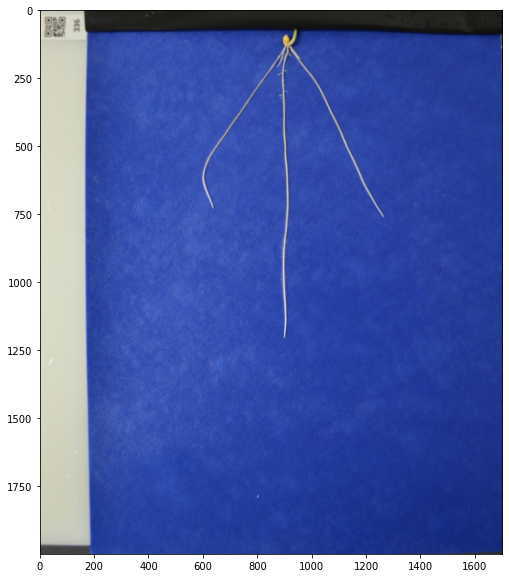

In [11]:
import random
n = random.sample(range(0, len(allfnames)), 1)
img = io.imread(allfnames[n[0]])
plt.figure(figsize=(10,10))
plt.imshow(img)

In [12]:
#plt.imsave(resultsFolder+"filename.jpg",img)

In [13]:
# Create a list of images
limg = []
for f in allfnames:
  limg.append(io.imread(f))


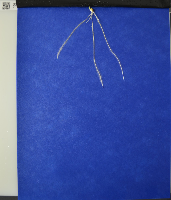
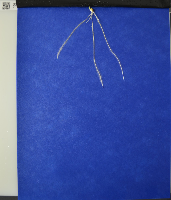
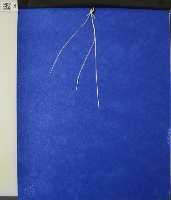
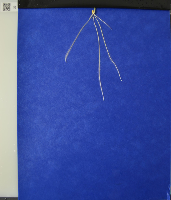
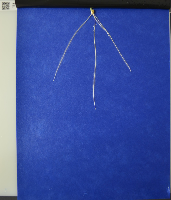
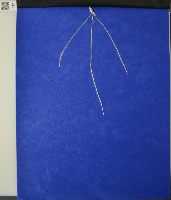
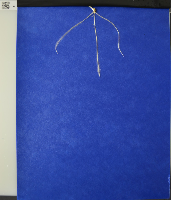
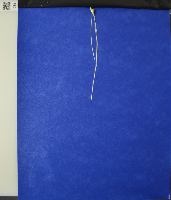
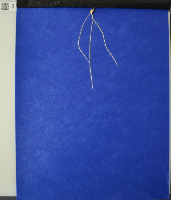
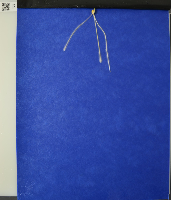
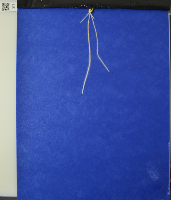
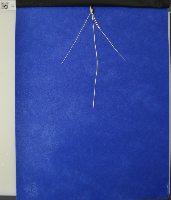
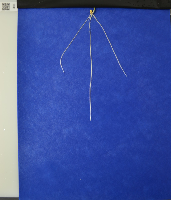
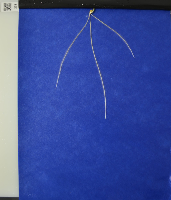
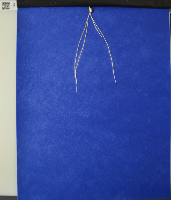
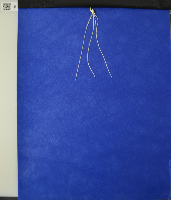
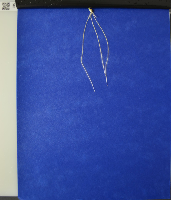
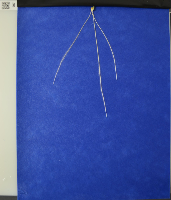

In [14]:
# Visualize a list of images
import plotly.express as px
vimg = np.stack(limg)
downsample = 10 
fig = px.imshow( vimg[:,::downsample,::downsample,:] , animation_frame=0, binary_string=True, labels=dict(animation_frame="root img"))
fig.show()


In [15]:
vimg.shape

(17, 1999, 1702, 3)

## 4.Image transformations
- rgb to gray
- smoothing: Gaussian and median
- smoothing and border-preserving
- thresholding

In [33]:
img2 = rgb2gray(img)
m,n = img2.shape

### Smoothing

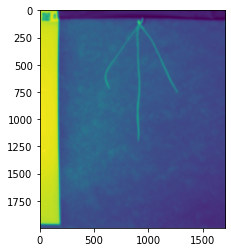

In [17]:
from skimage import filters
img3 = filters.gaussian(img2,sigma=7)
plt.imshow(img3)

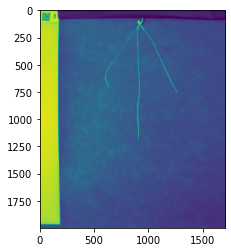

In [18]:
from skimage.morphology import disk
img4 = filters.median(img2,disk(7))
plt.imshow(img4)

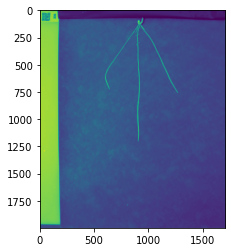

In [19]:
from skimage.filters.rank import mean_bilateral
img5 = util.img_as_ubyte(img2)
img5 = mean_bilateral(img5, disk(7), s0=10,s1=10)
plt.imshow(img5)

Text(0.5, 1.0, 'Hist of img5')

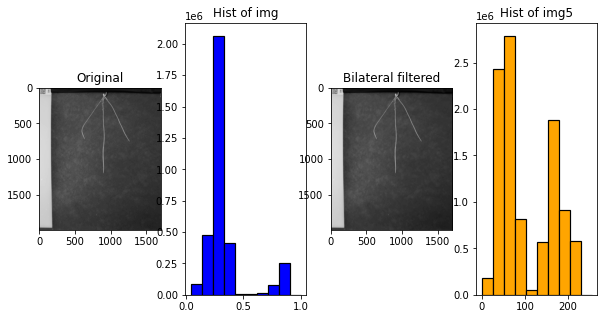

In [35]:
f, ax = plt.subplots(1, 4, figsize=(10, 5))

ax[0].imshow(img2,cmap='gray')
ax[0].set_title('Original')

ax[1].hist(img2.flatten(),color='blue',label='gray levels',edgecolor='black', linewidth=1.2) #util.img_as_uint8 img_as_ubyte
ax[1].set_title('Hist of img')

ax[2].imshow(img5,cmap='gray')
ax[2].set_title('Bilateral filtered')

ax[3].hist(img.flatten(),color='orange',label='gray levels',edgecolor='black', linewidth=1.2)
ax[3].set_title('Hist of img5')

### Thresholding

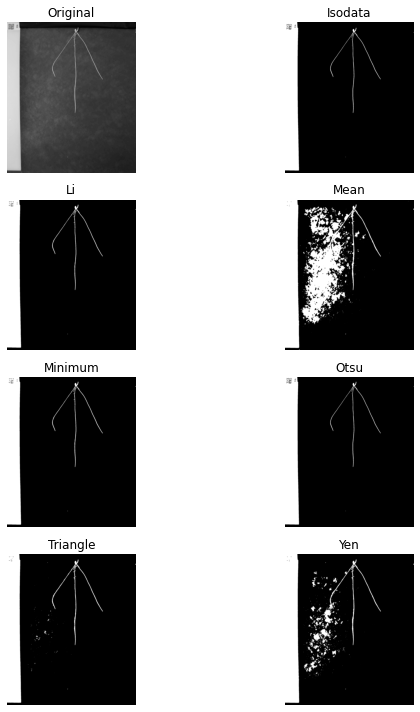

In [36]:
fig, ax = try_all_threshold(img5, figsize=(10, 10), verbose=False)

In [37]:
pathNfile = resultsFolder+'thresholdingMethods.jpg'
fig.savefig(pathNfile) # will save to your google folder

In [38]:
files.download(pathNfile) # will save to your local computer

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:
#Combining smoothing with thresholding
def quick_thresholding(img,threshold=0):
  img = rgb2gray(img)
  img = util.img_as_ubyte(img)
  img = mean_bilateral(img, disk(7), s0=10,s1=10)
  if threshold == 0:
    threshold = threshold_isodata(img)    #use isodata, a global thresholding method  
  #print(threshold)
  return img>threshold

### Visualizing Image Transformation

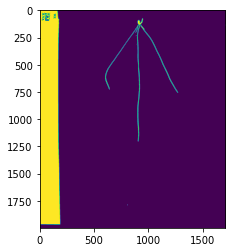

In [40]:
plt.imshow(quick_thresholding(img,0))


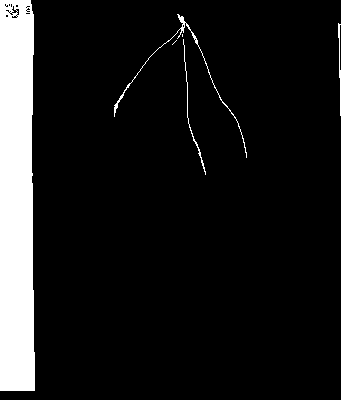
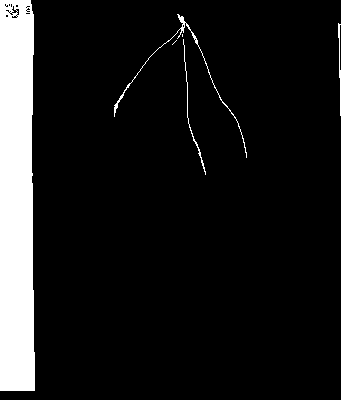
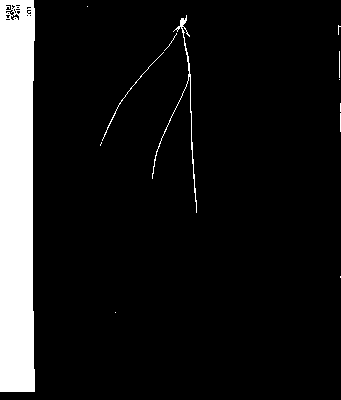
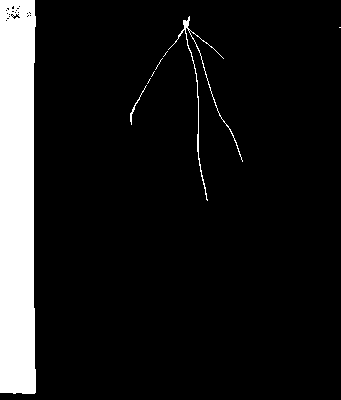
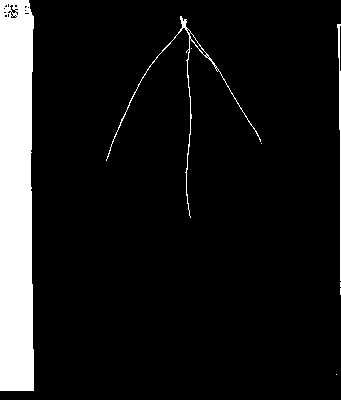
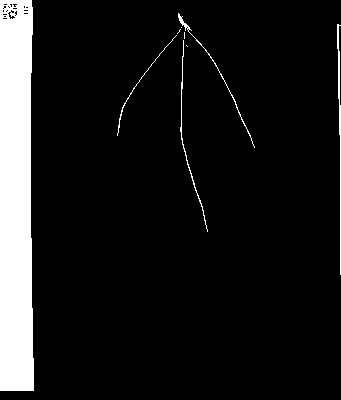
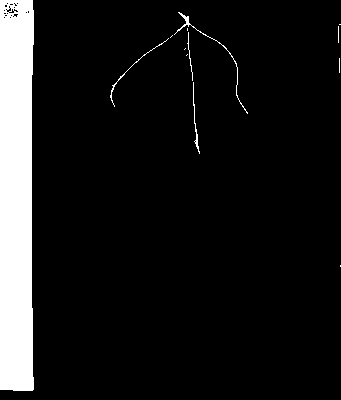
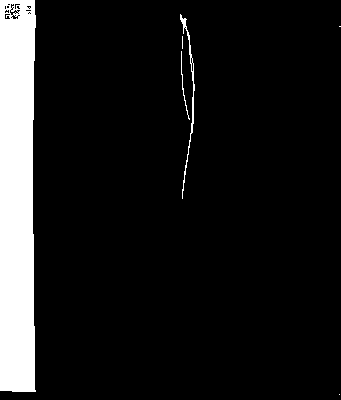
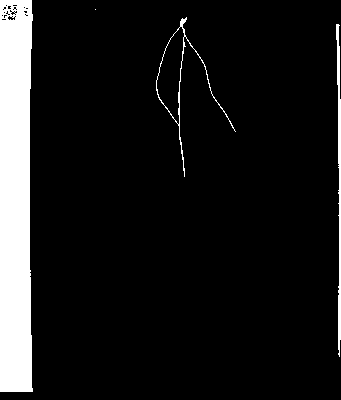
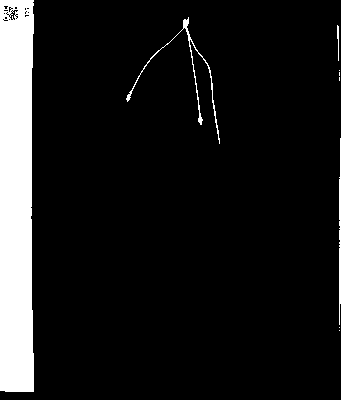
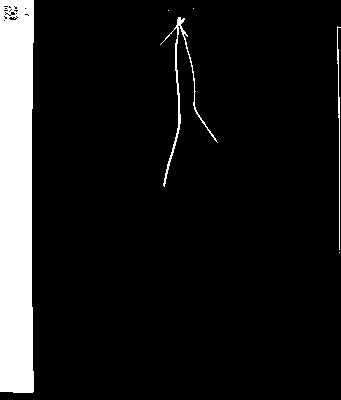
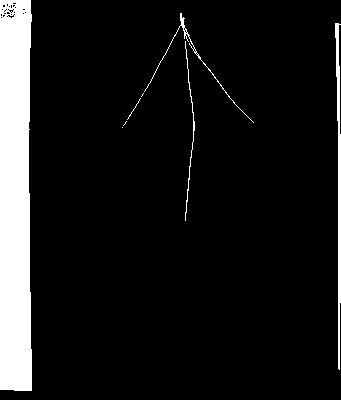
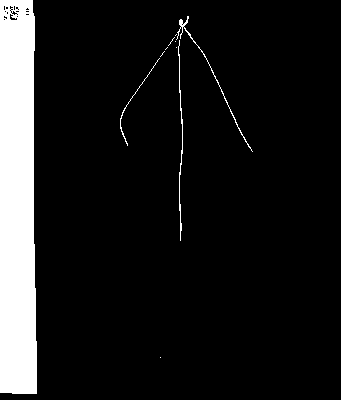
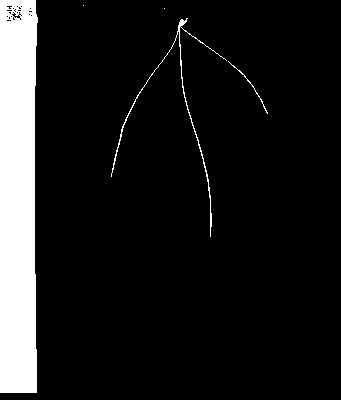
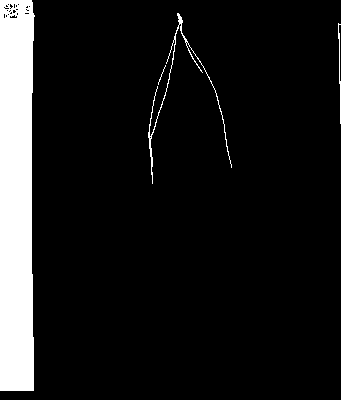
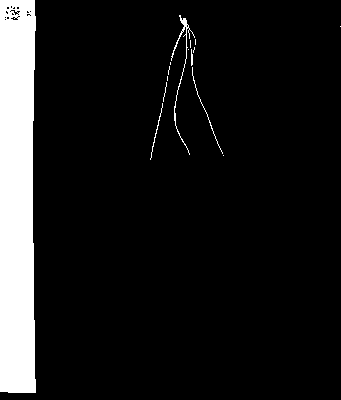
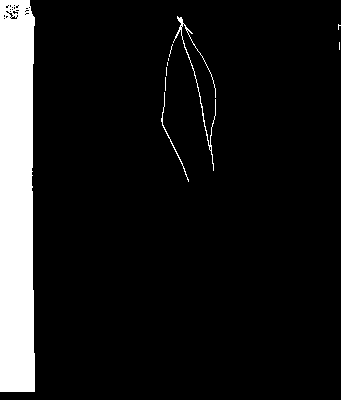
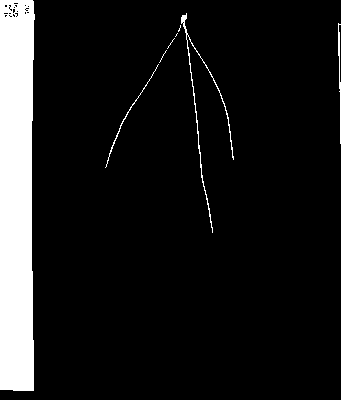

In [41]:
nfiles,_,_,_ = vimg.shape
limg2 = [quick_thresholding(img) for img in limg] # transform img for img in list
vimg = np.stack(limg2)
downsample = 5 
fig = px.imshow( vimg[:,::downsample,::downsample] , animation_frame=0, binary_string=True, labels=dict(animation_frame="root img"))
fig.show()

## 5.Manipulate spreadsheet
- read csv file
- quick search using Colab table display
- visualize point clouds

### Iris dataset
- 150 samples,	4 features, 3 classes:	setosa,	versicolor,	virginica

In [42]:
iris_data = pd.read_csv(tutFolder+"spreadsheets/iris.csv")
iris_data

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [43]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


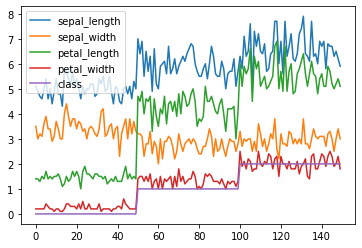

In [44]:
iris_data.plot()

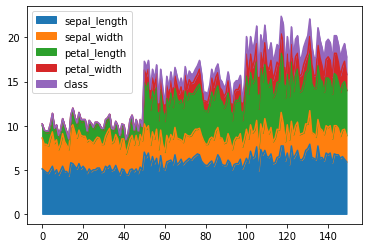

In [45]:
iris_data.plot.area()

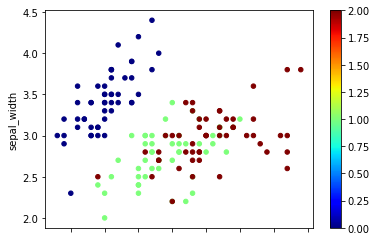

In [46]:
iris_data.plot.scatter(x='sepal_length', y='sepal_width', s=20, c=iris_data['class'],colormap='jet' )

In [47]:
?iris_data.plot.scatter

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f77d3552160>,
      dtype=object)

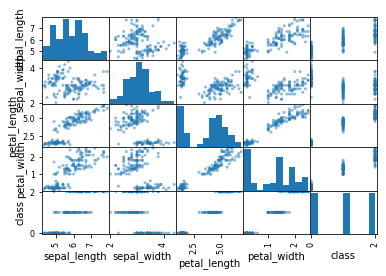

In [48]:
pd.plotting.scatter_matrix(iris_data)

In [49]:
classes = iris_data['class']
iris_data = iris_data[['sepal_length','sepal_width','petal_length','petal_width']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f77d305e4f0>,
      dtype=object)

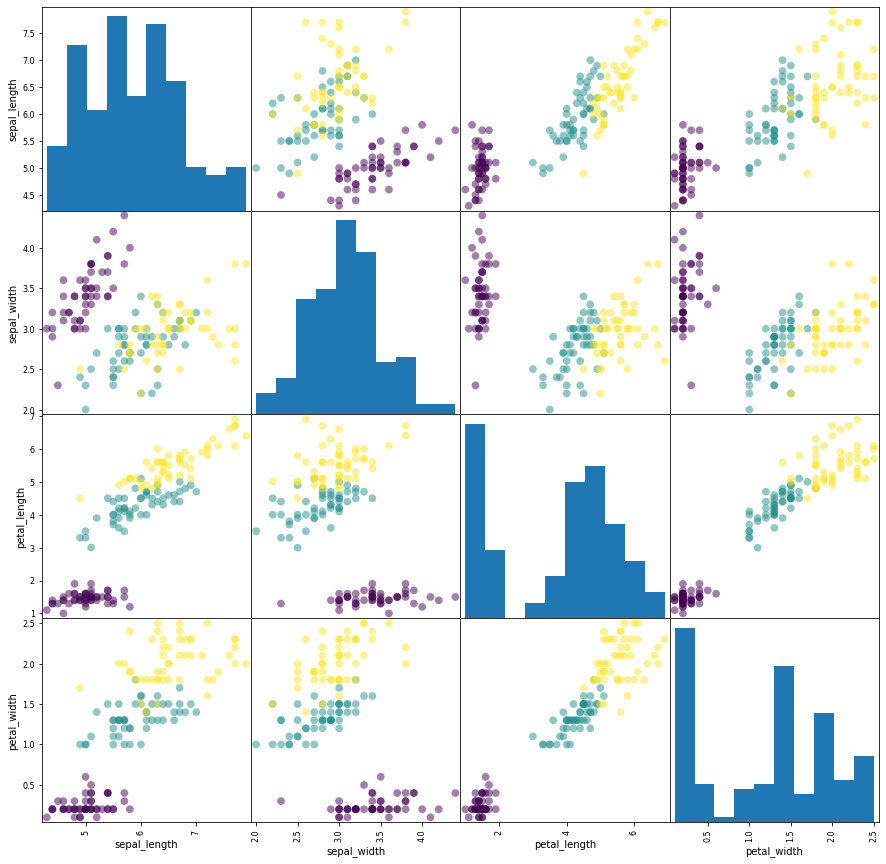

In [50]:
pd.plotting.scatter_matrix(iris_data, c= classes, figsize=(15,15), marker='o', s = 60)

## 6.Clustering multi-dimensional points

In [51]:
(n_samples, n_features), n_species = iris_data.shape, np.unique(classes).size

print(f"# species: {n_species}; # samples: {n_samples}; # features {n_features}")

# species: 3; # samples: 150; # features 4


In [52]:
markers=["o","v","*"]
pltmarkers = [markers[i] for i in classes] #the true class

In [53]:
from sklearn.cluster import KMeans
import mpl_toolkits.mplot3d 
kmeans = KMeans(init="k-means++", n_clusters=n_species, n_init=4, random_state=0)
kmeans.fit(iris_data)
klabels = kmeans.labels_

In [54]:
mycolors = ['red','green','yellow']
pltcolors = [mycolors[i] for i in klabels] #the estimated class

Text(0.5, 1.0, 'Iris dataset: marker is true class')

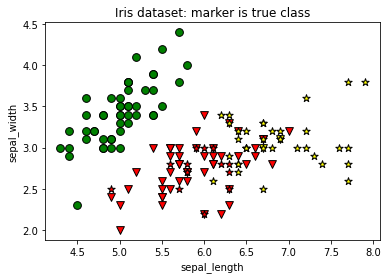

In [55]:
for x,y,l,m in zip(iris_data['sepal_length'], iris_data['sepal_width'], pltcolors, pltmarkers):
  plt.scatter(x,y, c=l, edgecolor="k",marker=m,s=60)
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')  
plt.title('Iris dataset: marker is true class')